**Image Thresholding:**
Image thresholding is used to binarize the image based on pixel intensities. The input to such thresholding algorithm is usually a grayscale image and a threshold. The output is a binary image.

If the intensity of a pixel in the input image is greater than a threshold, the corresponding output pixel is marked as white (foreground), and if the input pixel intensity intensity is less than or equal to the threshold, the output pixel location is marked black (background).

Image thresholding is used in many applications as a pre-processing step. For example, you may use it in medical image processing to reveal tumor in a mammogram or localize a natural disaster in satellite images.

A problem with simple thresholding is that you have to manually specify the threshold value. We can manually check how good a threshold is by trying different values but it is tedious and it may break down in the real world.

So, we need a way to automatically determine the threshold. The Otsu’s technique named after its creator Nobuyuki Otsu is a good example of auto thresholding.

Image segmentation refers to the class of algorithms that partition the image into different segments or groups of pixels.

In that sense, image thresholding is the simplest kind of image segmentation because it partitions the image into two groups of pixels — white for foreground, and black for background.

Image thresholding be future sub-divied into the local and global image tresholding algorithms.

**In global thresholding, a single threshold is used globally, for the whole image.**

**In local thresholding, some characteristics of some local image areas (e.g. the local contrast) may be used to choose a different threshold for different parts of the image.**

**Otsu’s method is a global image thresholding algorithm.**

 **Otsu’s approach:** A nonparametric and unsupervised method of automatic
threshold selection for picture segmentation is presented. The method processes image histogram, segmenting the objects by minimization of the variance on each of the classes. Usually, this technique produces the appropriate results for bimodal images. The histogram of such image contains two clearly expressed peaks, which represent different ranges of intensity values.

As it was shown in the Otsu’s paper there are actually two options to find the threshold. The first is to minimize the within-class variance, the second is to maximize the between-class variance.
 

In [1]:
# Python program to illustrate
# Otsu thresholding type on an image
  
# organizing imports
import cv2         
import numpy as np 
import matplotlib.pyplot as plt 
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sample.jpg to sample.jpg


In [3]:
image = cv2.imread('sample.jpg')

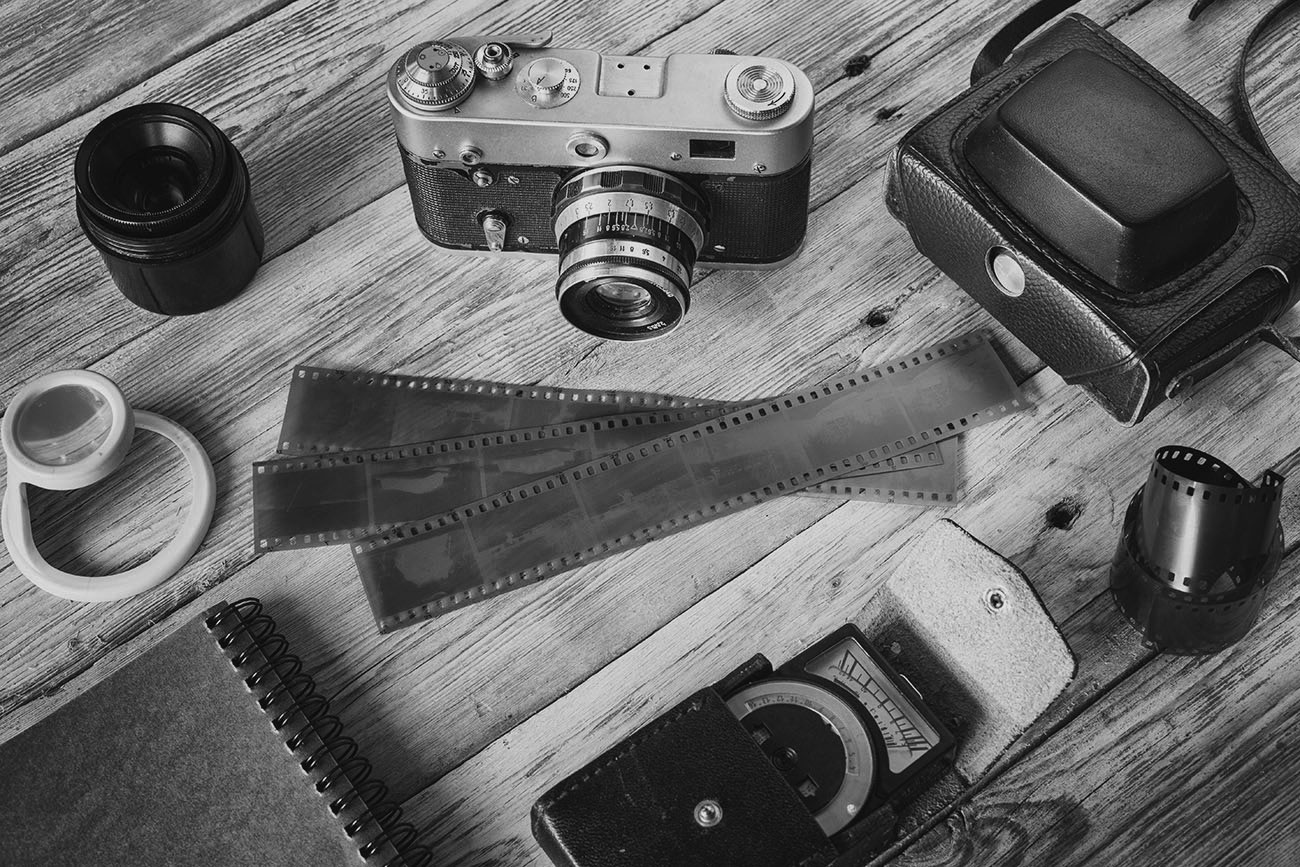

In [4]:
cv2_imshow(image)

In [6]:
# Apply GaussianBlur to reduce image noise if it is required
image = cv2.GaussianBlur(image, (5, 5), 0)

In [7]:
# Set total number of bins in the histogram
bins_num = 256
 
# Get the image histogram
hist, bin_edges = np.histogram(image, bins=bins_num)
 
# Get normalized histogram if it is required
hist = np.divide(hist.ravel(), hist.max())
 
# Calculate centers of bins
bin_mids = (bin_edges[:-1] + bin_edges[1:]) / 2.
 
# Iterate over all thresholds (indices) and get the probabilities w1(t), w2(t)
weight1 = np.cumsum(hist)
weight2 = np.cumsum(hist[::-1])[::-1]
 
# Get the class means mu0(t)
mean1 = np.cumsum(hist * bin_mids) / weight1
# Get the class means mu1(t)
mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]
 
inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
 
# Maximize the inter_class_variance function val
index_of_max_val = np.argmax(inter_class_variance)
 
threshold = bin_mids[:-1][index_of_max_val]
print("Otsu's algorithm implementation thresholding result: ", threshold)

Otsu's algorithm implementation thresholding result:  106.662109375


The execution result is:

Otsu's algorithm implementation thresholding result: 106.662109375

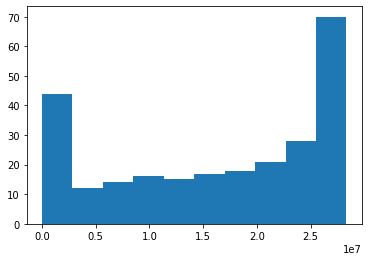

In [8]:
plt.hist(inter_class_variance)
plt.show()

Text(0, 0.5, 'pixels')

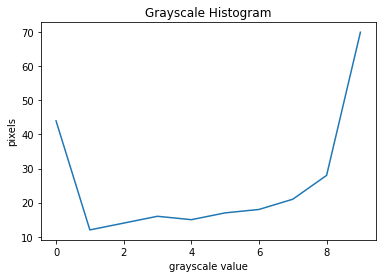

In [9]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(inter_class_variance)

#fig, ax = plt.subplots()
plt.plot(histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")